In [103]:
library("Rmisc")
library("ggplot2")

In [104]:
SEED <- 992
M <- 900
LAMBDA <- 0.98
CONF_LEVEL <- 0.93

In [105]:
set.seed(SEED)

In [106]:
df <- data.frame()
for (n in seq(from = 100, to = 5000, by = 100)) {
  amplitude <- c()
  for (i in 1:M) {
    samples <- rexp(n, rate = LAMBDA)
    conf_interval <- CI(samples, ci = CONF_LEVEL)
    amplitude <- append(amplitude,
      c(abs(conf_interval[["upper"]] - conf_interval[["lower"]])))
  }
  mean_amplitude <- mean(amplitude)

  df <- rbind(df, data.frame(n = n, amplitude = mean_amplitude))
}

df

n,amplitude
<dbl>,<dbl>
100,0.36889203
200,0.26285102
300,0.21308227
400,0.18498278
500,0.16583158
600,0.15069018
700,0.13984877
800,0.13055913
900,0.12324581


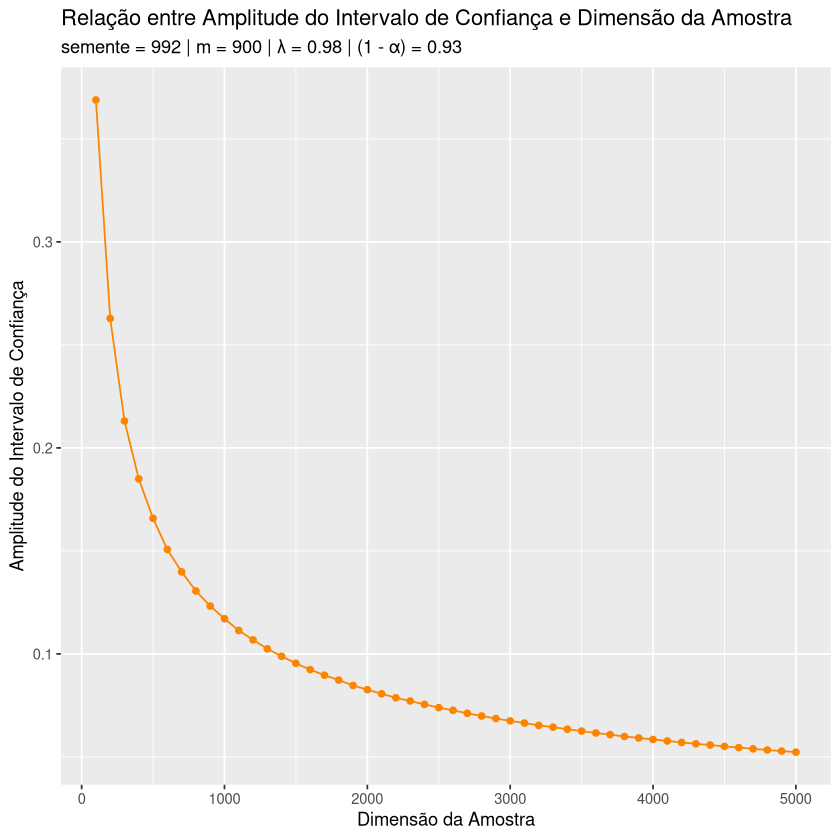

In [118]:
ggplot(df, aes(x = n, y = amplitude)) +
  geom_line(color = "#fb8500") +
  geom_point(color = "#fb8500") +
  xlab("Dimensão da Amostra") +
  ylab("Amplitude do Intervalo de Confiança") +
  labs(title = "Relação entre Amplitude do Intervalo de Confiança e Dimensão da Amostra",
    subtitle = sprintf("semente = %d | m = %d | λ = %.2f | (1 - α) = %.2f",
      SEED, M, LAMBDA, CONF_LEVEL))

Através do gráfico obtido, conseguimos concluir que quanto maior a dimensão da amostra
menor será a amplitude do intervalo de confiança. A relação entre estas duas variáveis
é logarítmica.